In [53]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [54]:
dataset = pd.read_csv("train.csv")

In [55]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [57]:
a = dataset.iloc[:,[2,5,6,7,9,11,1]]

In [58]:
print("\nMissing values before imputing ",a.isna().sum())
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
b = a.values
b[:,[0,1,2,3,4]] = imp.fit_transform(b[:,[0,1,2,3,4]])
print("\nMissing values after imputing ",pd.DataFrame(b).isna().sum())


Missing values before imputing  Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

Missing values after imputing  0    0
1    0
2    0
3    0
4    0
5    2
6    0
dtype: int64


In [59]:
print("\nMissing values after removal\n",a.isna().sum())
a = pd.DataFrame(a)
a = a.dropna()
print("\nMissing values after removal\n",pd.DataFrame(a).isna().sum())
a = a.values


Missing values after removal
 Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

Missing values after removal
 Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


In [60]:
lb = LabelEncoder()
a[:,-1] = lb.fit_transform(a[:,-1])
print("\nAfter label encoding ",a)


After label encoding  [[3 22.0 1 ... 7.25 'S' 0]
 [1 38.0 1 ... 71.2833 'C' 1]
 [3 26.0 0 ... 7.925 'S' 1]
 ...
 [1 19.0 0 ... 30.0 'S' 1]
 [1 26.0 0 ... 30.0 'C' 1]
 [3 32.0 0 ... 7.75 'Q' 0]]


In [62]:
transformer = ColumnTransformer(
    transformers = [("OneHot",OneHotEncoder(),[5])],
    remainder = 'passthrough'
)
a = transformer.fit_transform(a.tolist())
print("\nAfter one hot encoding ",a)


After one hot encoding  [[0.0 0.0 1.0 ... 0 7.25 0]
 [1.0 0.0 0.0 ... 0 71.2833 1]
 [0.0 0.0 1.0 ... 0 7.925 1]
 ...
 [0.0 0.0 1.0 ... 0 30.0 1]
 [1.0 0.0 0.0 ... 0 30.0 1]
 [0.0 1.0 0.0 ... 0 7.75 0]]


In [63]:
X = a[:,:-1]
Y = a[:,-1]

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [65]:
print("\nAfter standard scaling ",X)


After standard scaling  [[-0.47261792 -0.20232566  0.53403984 ...  0.52251079 -0.50678737
  -0.51637992]
 [ 2.11587407 -0.20232566 -1.87251946 ...  0.52251079 -0.50678737
   0.69404605]
 [-0.47261792 -0.20232566  0.53403984 ... -0.55271372 -0.50678737
  -0.50362035]
 ...
 [-0.47261792 -0.20232566  0.53403984 ... -0.55271372 -0.50678737
  -0.08633507]
 [ 2.11587407 -0.20232566 -1.87251946 ... -0.55271372 -0.50678737
  -0.08633507]
 [-0.47261792  4.94252683 -1.87251946 ... -0.55271372 -0.50678737
  -0.50692839]]


In [66]:
a_train,a_test,Y_train,Y_test = train_test_split(a,Y,test_size=0.2)


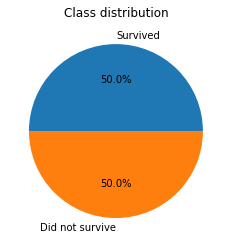

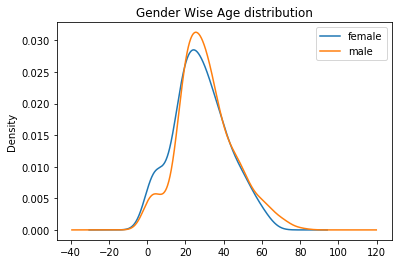

No handles with labels found to put in legend.


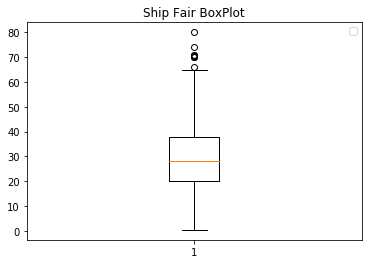

In [68]:
plt.pie([len(Y==1),len(Y==0)],labels=["Survived","Did not survive"],autopct='%1.1f%%')
plt.title("Class distribution")
plt.show()

dataset.groupby('Sex').Age.plot(kind='kde')
plt.title("Gender Wise Age distribution")
plt.legend()
plt.show()

plt.boxplot(a[:,4])
plt.title("Ship Fair BoxPlot")
plt.legend()
plt.show()